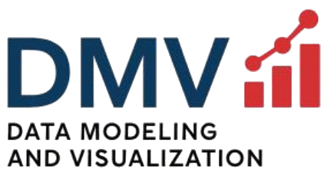

# **Week 2: Use of Grammar of Graphics approaches to visualise data**

In this session, we are going to visualise a dataset from Gapminder, which contains data on life expectancy, GDP per capita and population by country. For more information, see http://www.gapminder.org/data/.

Load the `gapminder.csv` data using pandas. This step is essential for preparing the dataset for analysis.

In [34]:
try: # Import the package if already installed
    import matplotlib.pyplot as plt
except: # Otherwise install the package first and then import
    !pip install matplotlib
    import matplotlib.pyplot as plt
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *

# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
file_name = 'gapminder.csv'
output_plot = 'p9plot.png'

# Load the data:
df = pd.read_csv(folder_path+file_name)

# Check if the data is loaded correctly
df.head(15)

Mounted at /content/drive


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Using Matplotlib, let us plot life expectancy over time for the United Kingdom.

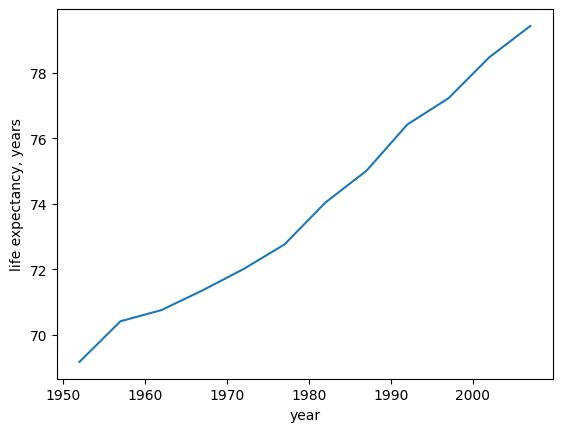

In [36]:
mask_uk = df["country"] == "United Kingdom"
df_uk = df[mask_uk]

plt.plot(df_uk["year"], df_uk["lifeExp"])
plt.xlabel("year")
plt.ylabel("life expectancy, years")
plt.show()

Again, using Matplotlib, overlay on the same plot, life expectancy plots for the UK and Burkina Faso. Let us add a legend which indicates which plot corresponds to which country.

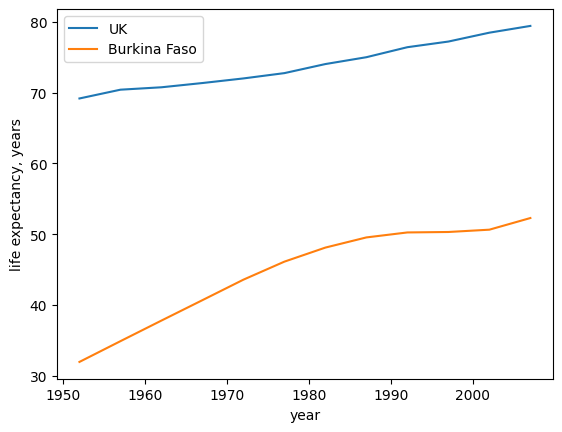

In [37]:
mask_bf = df["country"] == "Burkina Faso"
df_bf = df[mask_bf]

plt.plot(df_uk["year"], df_uk["lifeExp"], label="UK")
plt.plot(df_bf["year"], df_bf["lifeExp"], label="Burkina Faso")
plt.xlabel("year")
plt.ylabel("life expectancy, years")
plt.legend()
plt.show()

Now, we are going to use `plotnine`'s `ggplot` function to produce the same plot: life expectancy over time for both the UK and Burkina Faso. Let us first create a data frame that keeps only those rows for the UK and Burkina Faso.

In [38]:
df_uk_bf = df.query('country in ["United Kingdom", "Burkina Faso"]')

Next run the following code to plot the life expectancies over time:

`(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colthe user's='country')) +
geom_line())`

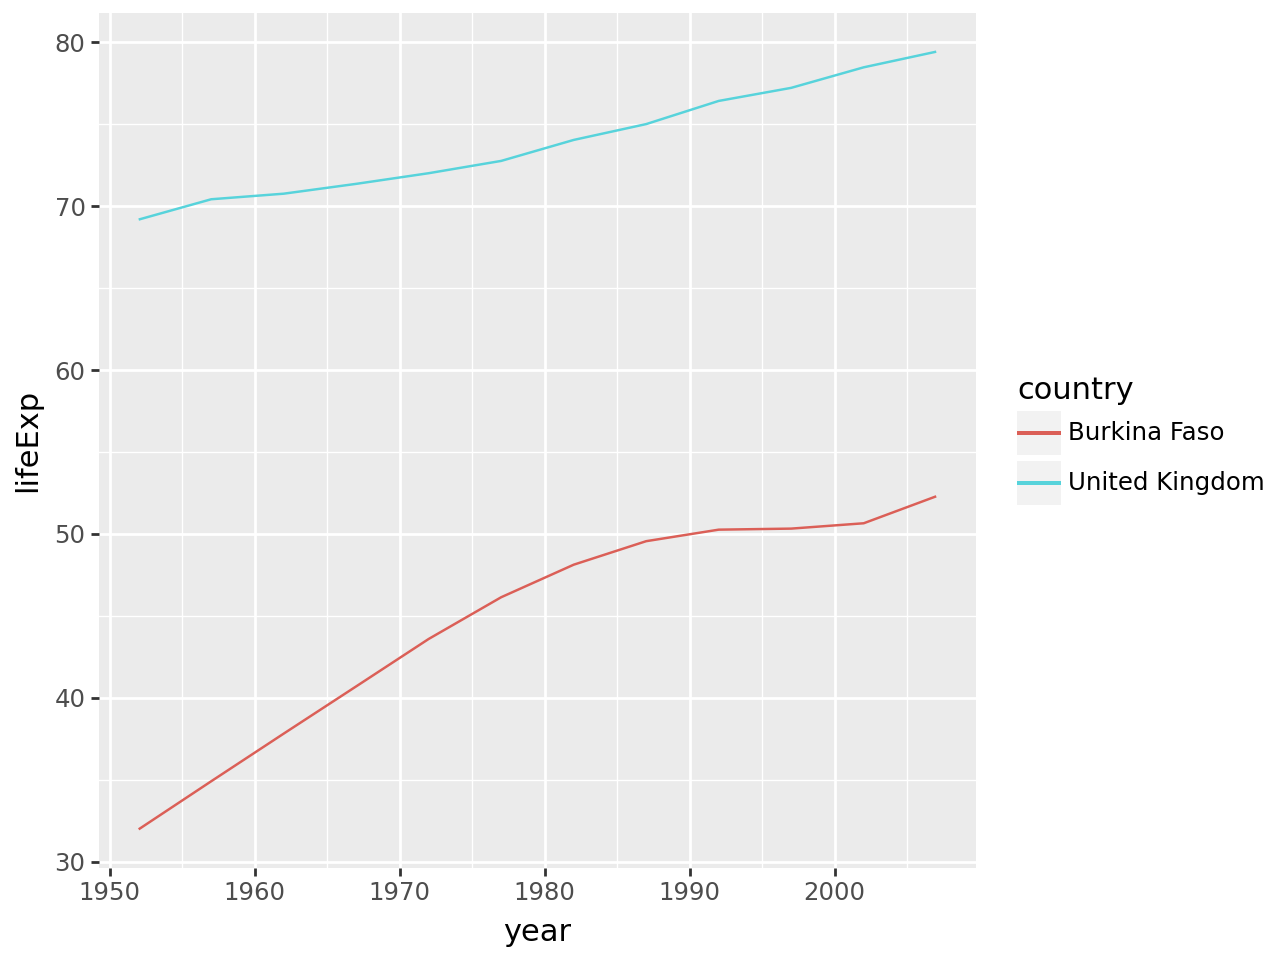

In [39]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_line())

### **What are aesthetics and geoms**?

`aes(x='year', y='lifeExp', colour='country')`<br>
1. It associates aesthetics with values for each of the data points
2. Aesthetics are characteristics that control how the data can be visualized
3. Here, it associates: <br>
    a. The horizontal position of data points with 'year' <br>
    b. The vertical position with 'lifeExp' <br>
    c. The colour of points with 'country' <br>
<br>

`geom_line()` <br>
1. It controls how aesthetics are displayed
2. `geom` are geometrical element used to represent data
3. For example, `geom_line()` will plot line, `geom_point()` will plot points, `geom_smooth()` will plot linear regression plot, `geom_histrogram()` will plot a histogram and so on.



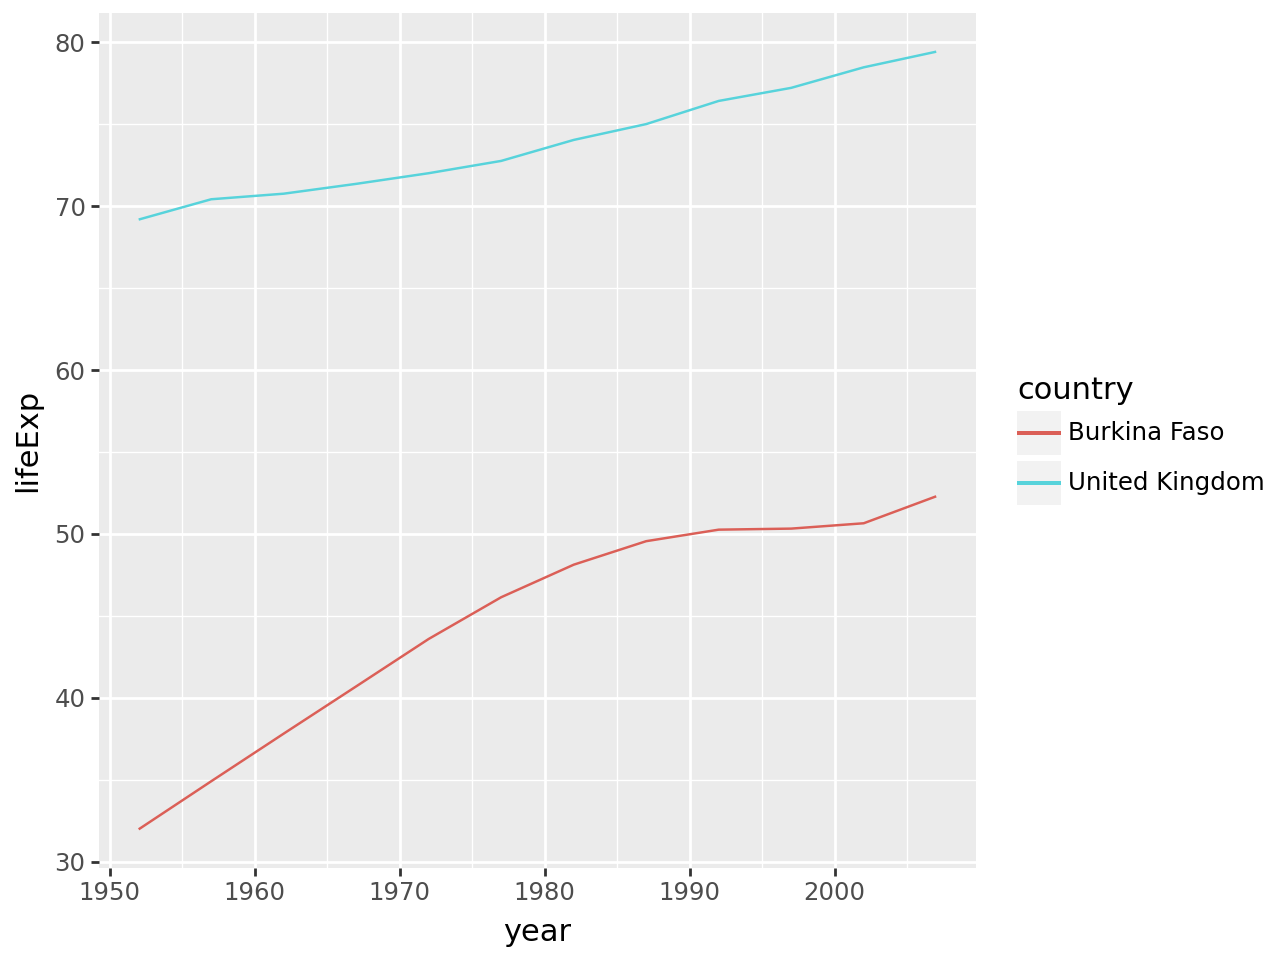

In [40]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_line())

Now change `geom_line` to `geom_point` and examine how that changes the plot.

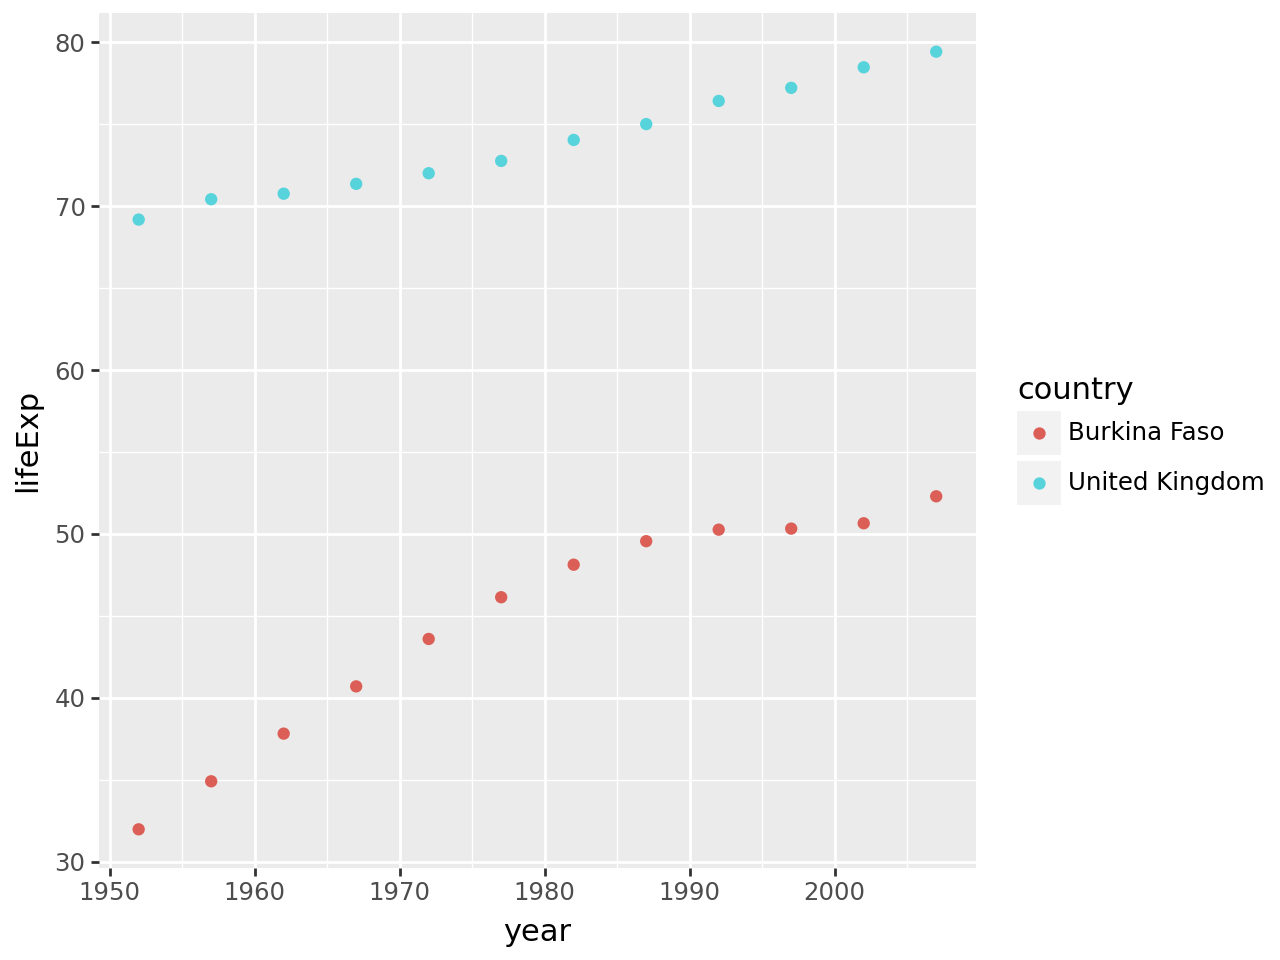

In [41]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_point())

We can also layer geoms. Now add back in `+ geom_line()` in addition to `geom_point()`. What does this plot look like?

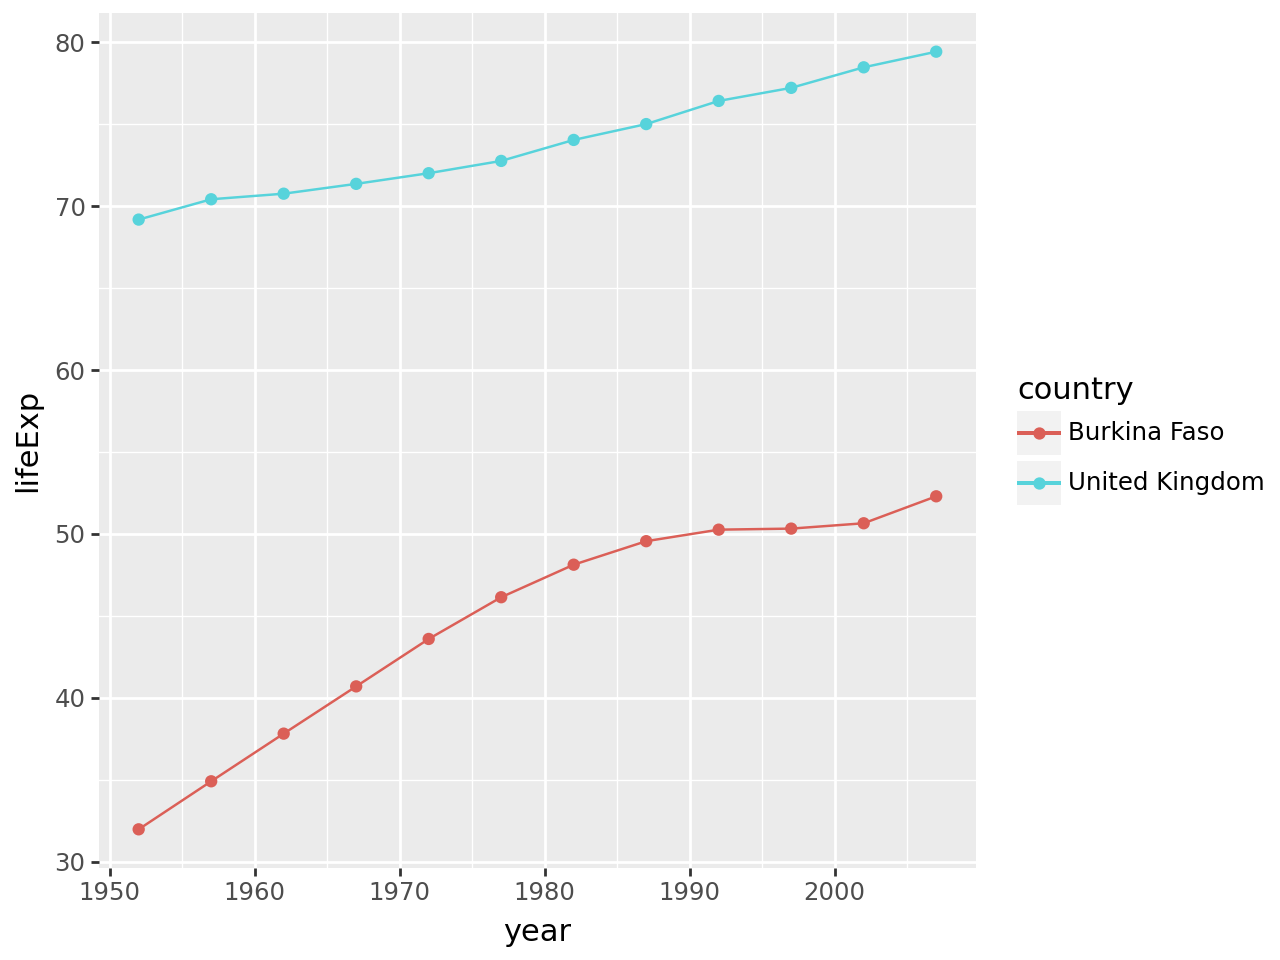

In [42]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_point() +
geom_line())

Suppose if we want to add linear regression lines to data from each country. We can do this by adding `+ geom_smooth(method="lm")` to the end of the user's plot command.

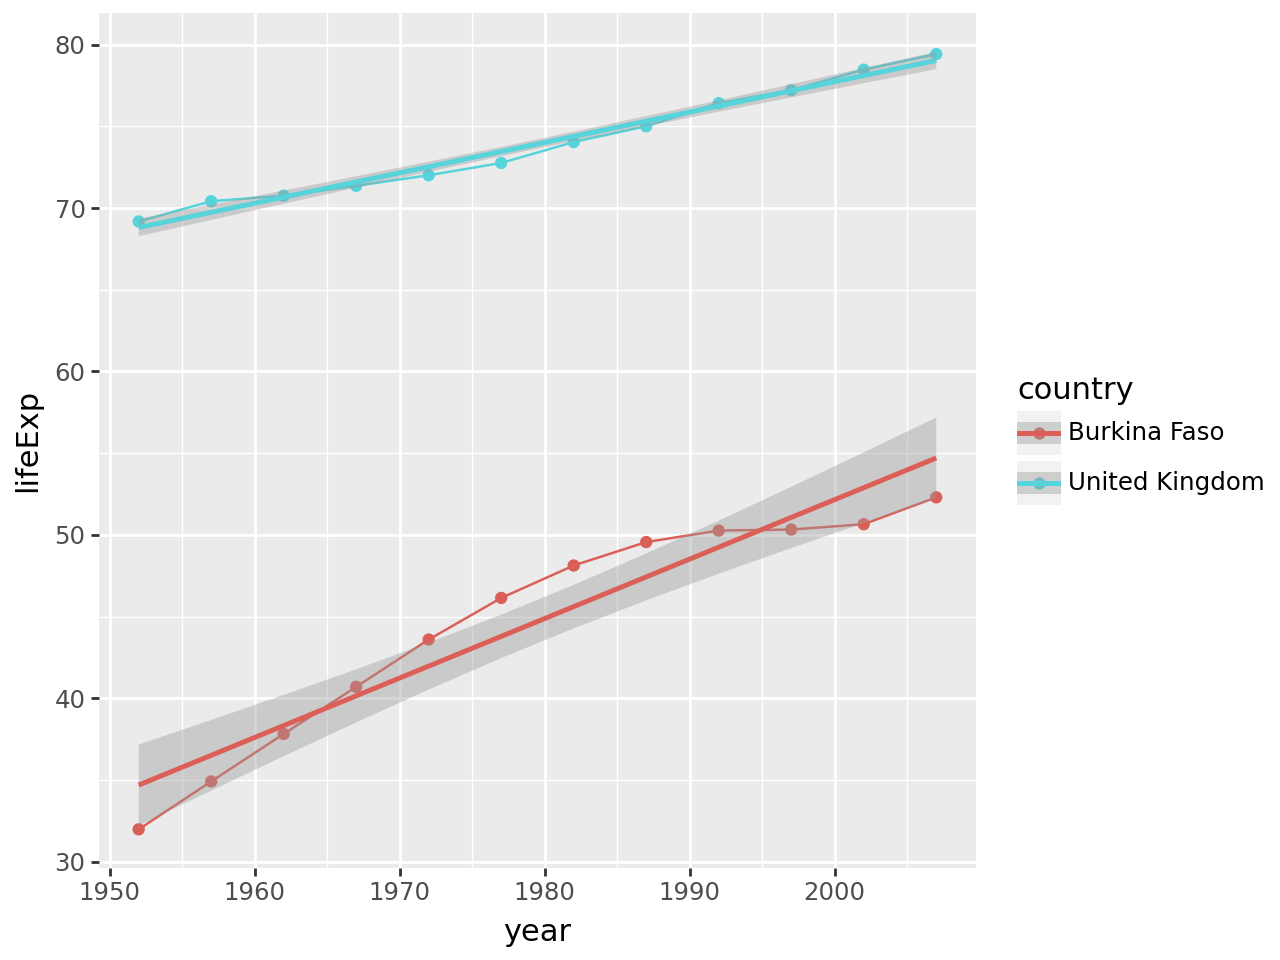

In [9]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_point() +
geom_line() +
geom_smooth(method="lm"))

We can remove the uncertainty intervals from the plots by changing `+ geom_smooth(method="lm")` to `+ geom_smooth(method="lm", se=False)`.

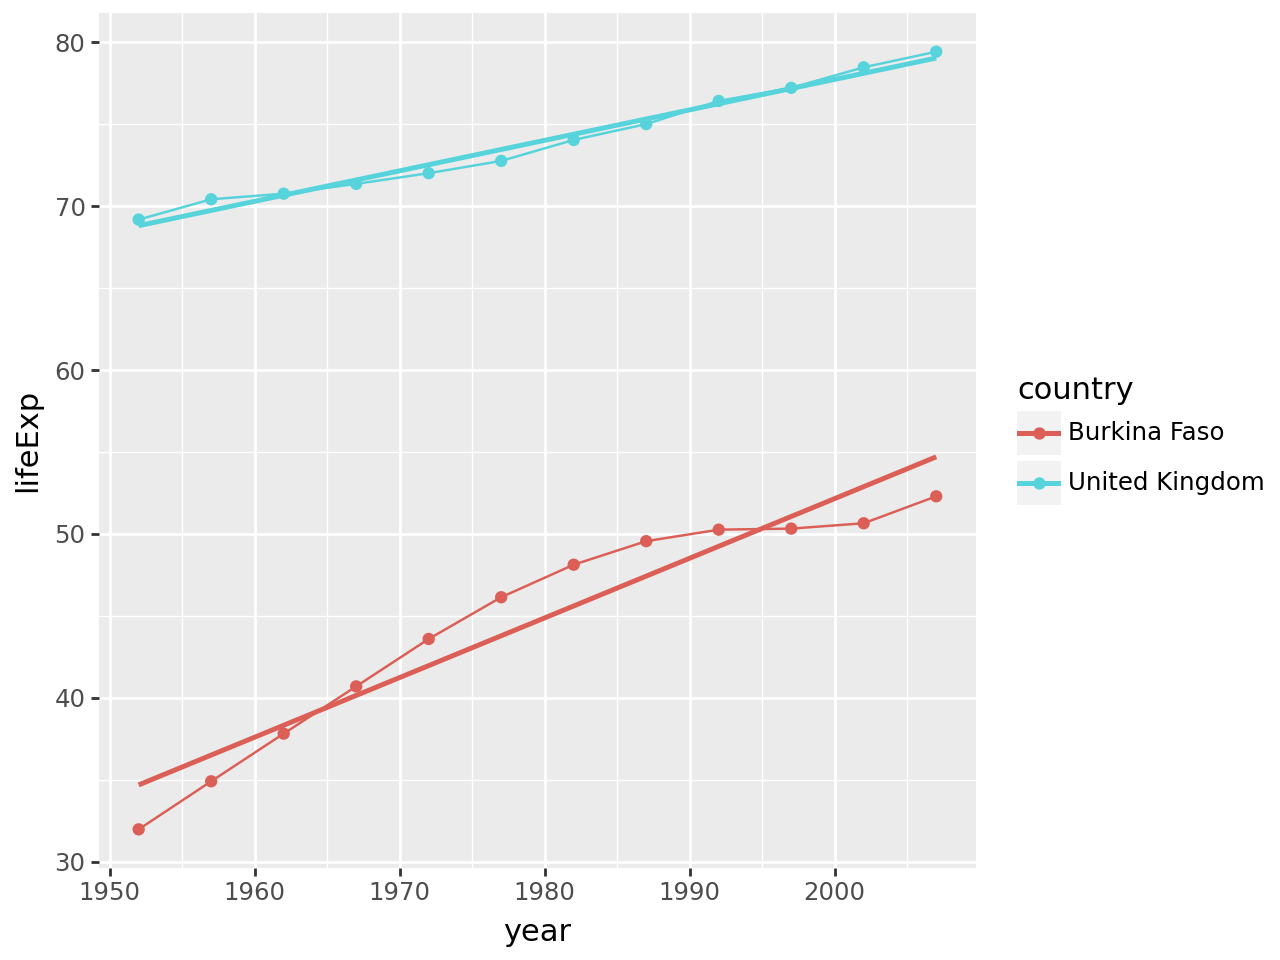

In [10]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_point() +
geom_line() +
geom_smooth(method="lm", se=False))

Suppose instead of plotting two regression lines, we want a single regression line representing the trends across both countries. To do this, we can run the following code:

`(ggplot(df_uk_bf, aes(x='year', y='lifeExp')) +
geom_point(aes(colthe user's='country')) +
geom_smooth(method="lm", se=False))`

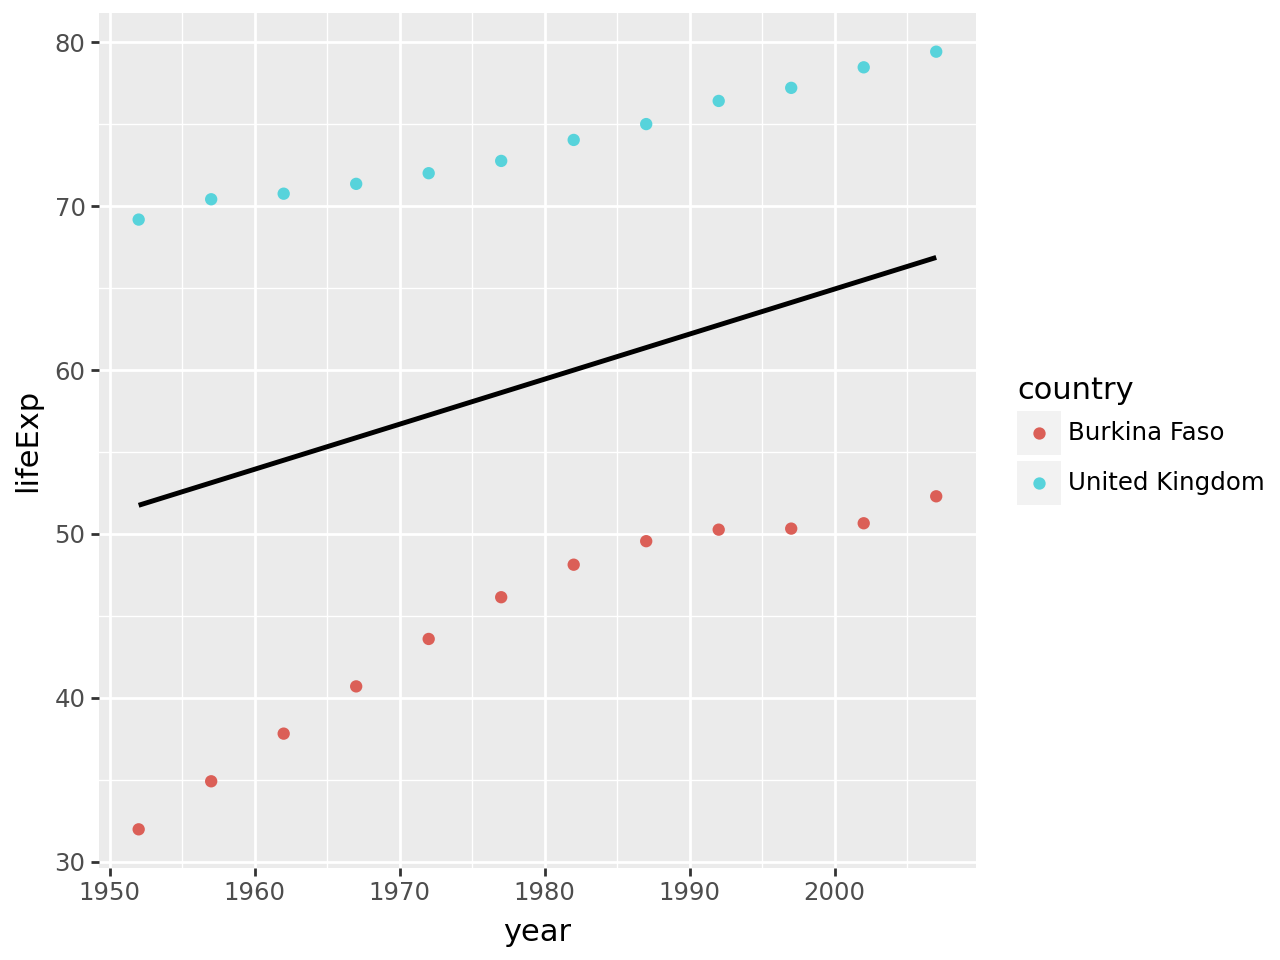

In [43]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp')) +
geom_point(aes(colour='country')) +
geom_smooth(method="lm", se=False))

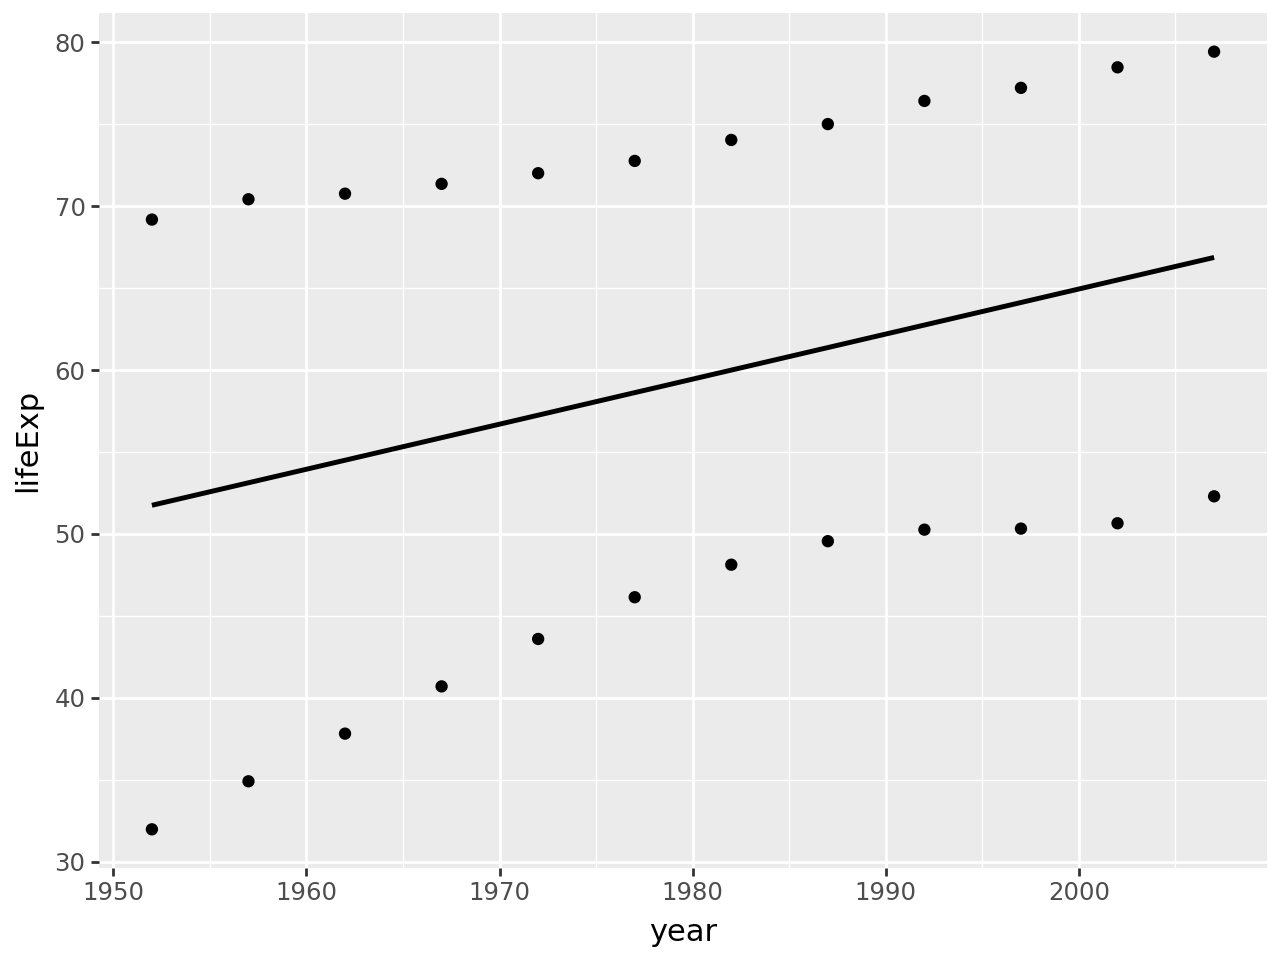

In [44]:
(ggplot(df_uk_bf, aes(x='year', y='lifeExp')) +
geom_point() +
geom_smooth(method="lm", se=False))

**Why has the above plotted a single regression line?**

It's because whilst we use a colour aesthetic, the colour aesthetic is used only by `geom_point` and not inherited by `geom_smooth`. Whereas in the former case the colour `aesthetic` is stated in the `ggplot` section which means it is inherited by downstream geoms, including `geom_smooth` meaning it creates two regression lines — one for each colour.

Now use to `ggplot` to create a similar plot except plotting all countries in the Americas.

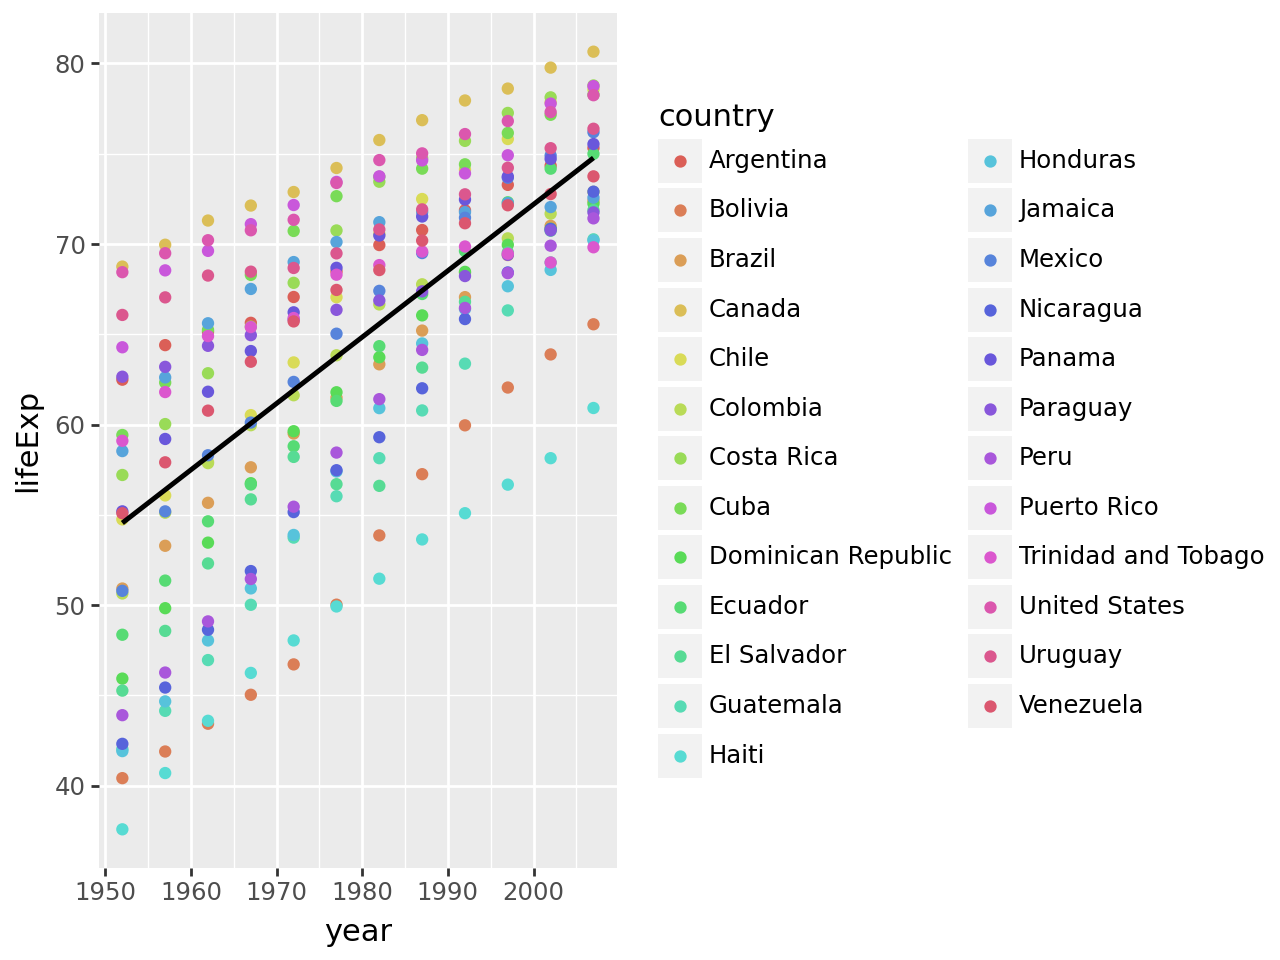

In [12]:
df_americas = df.query('continent == "Americas"')

(ggplot(df_americas, aes(x='year', y='lifeExp')) +
geom_point(aes(colour='country')) +
geom_smooth(method="lm", se=False))

We can also change the straight regression line into a curvy line using a locally weighted regression (known as a `loess` line). To do this, change from:

`geom_smooth(method="lm", se=False)` to `geom_smooth()`


/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


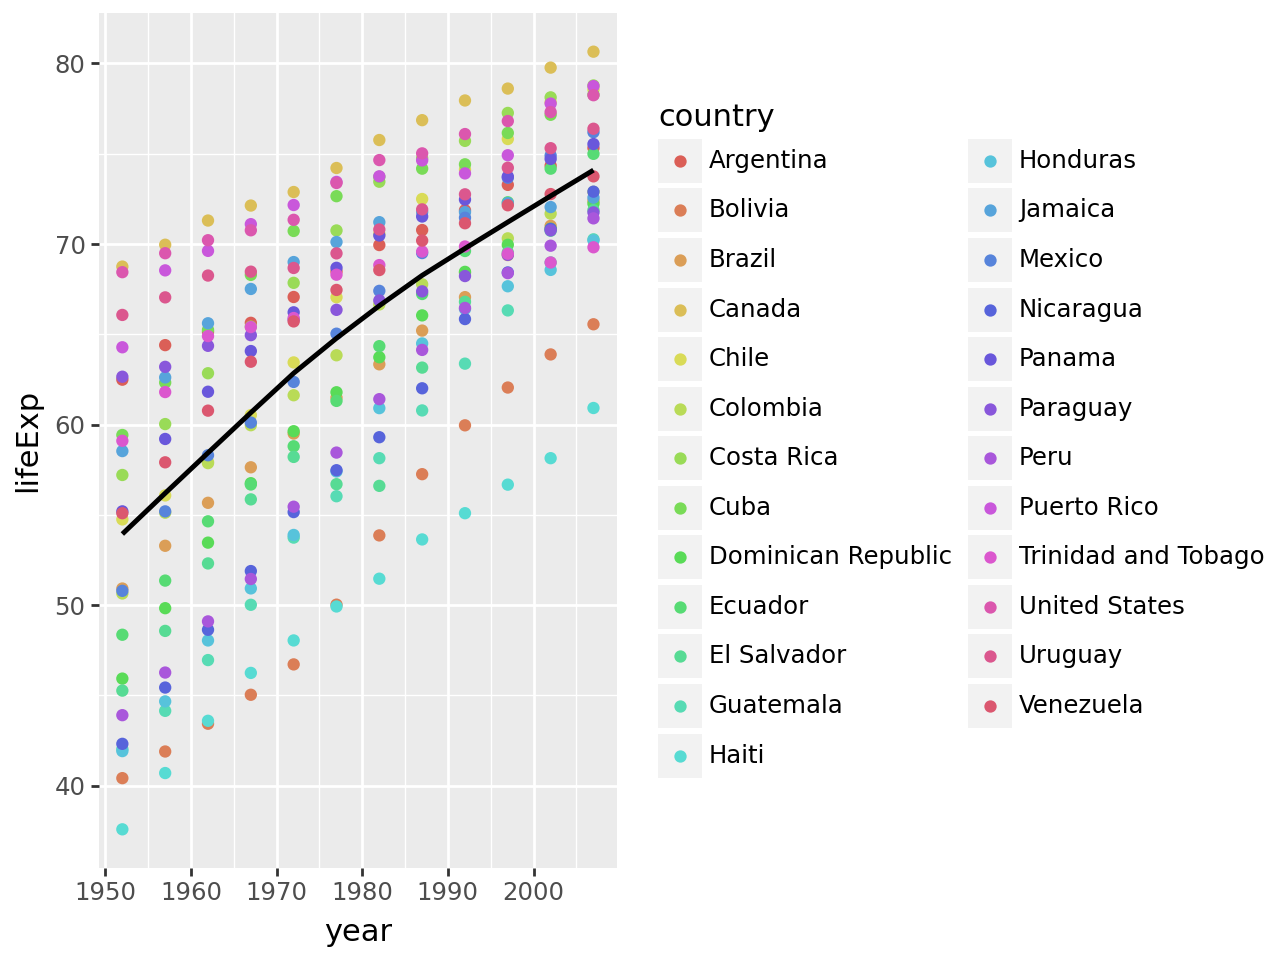

In [13]:
(ggplot(df_americas, aes(x='year', y='lifeExp')) +
geom_point(aes(colour='country')) +
geom_smooth())

We can also use `ggplot` to plot life expectancy over time for each continent in a given panel. To do so, run the following code:

`(ggplot(df, aes(x='year', y='lifeExp')) +
geom_point() +
facet_wrap('continent'))`

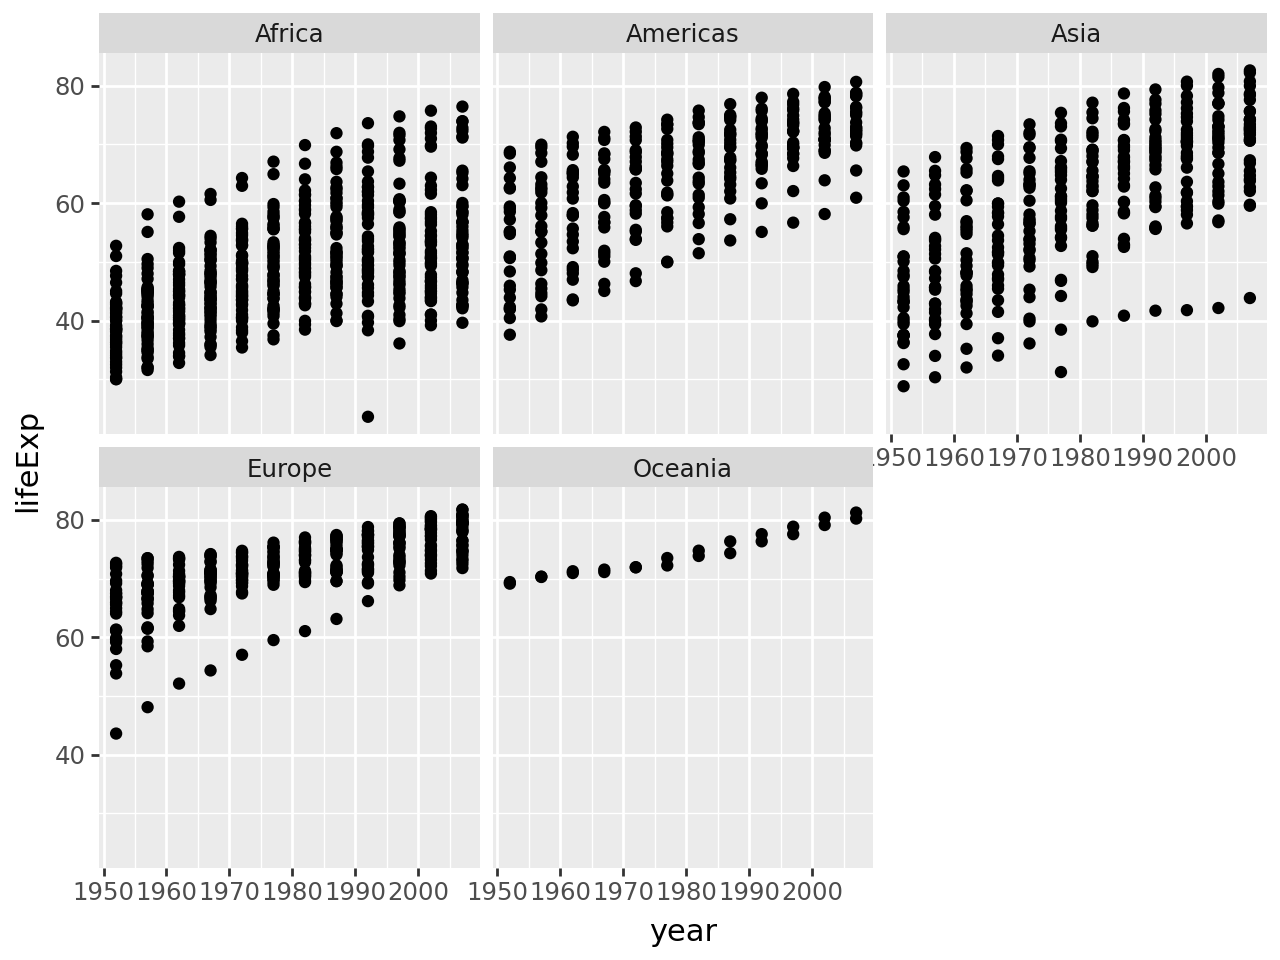

In [14]:
(ggplot(df, aes(x='year', y='lifeExp')) +
geom_point() +
facet_wrap('continent'))

Add a loess regression line to each of the panels above. We will keep the regression lines colour as red.

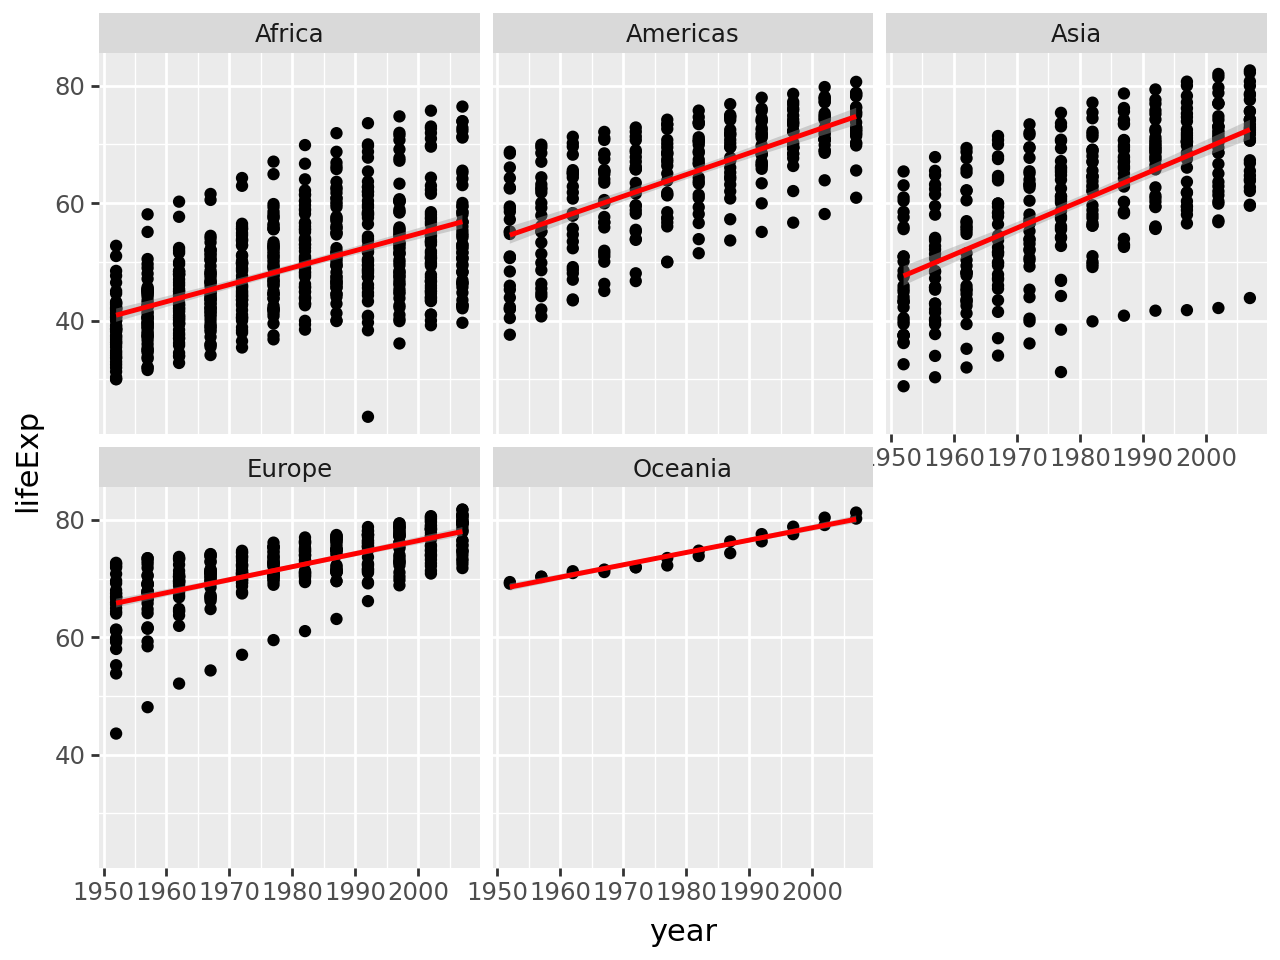

In [15]:
(ggplot(df, aes(x='year', y='lifeExp')) +
geom_point() +
geom_smooth(colour="red") +
facet_wrap('continent'))

## **Answer a question based on visualization**

Using visualisations, assess the following statement:

**Are increases in gdp per capita associated with increases in life expectancy?**

One way to assess this statement is to examine correlations between life expectancy and gdp per capita. To do this, we can first correlate these for all the data.

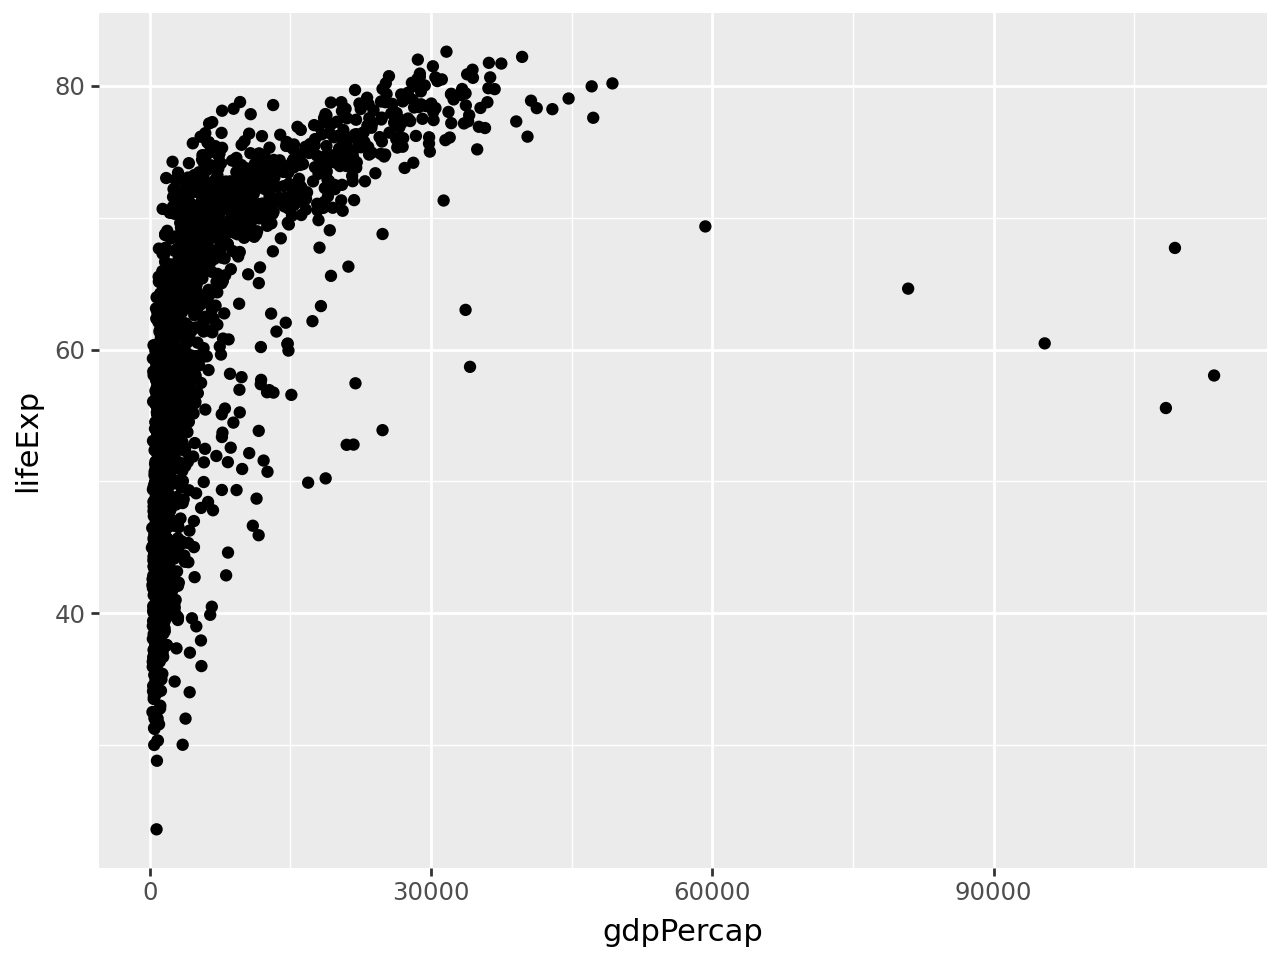

In [16]:
(ggplot(df, aes(x='gdpPercap', y='lifeExp')) +
geom_point())

The above is immediately interesting: life expectancy is more in richer countries. But we can't answer fully yet.

Another way to plot this is using a log x scale to visualise the data.

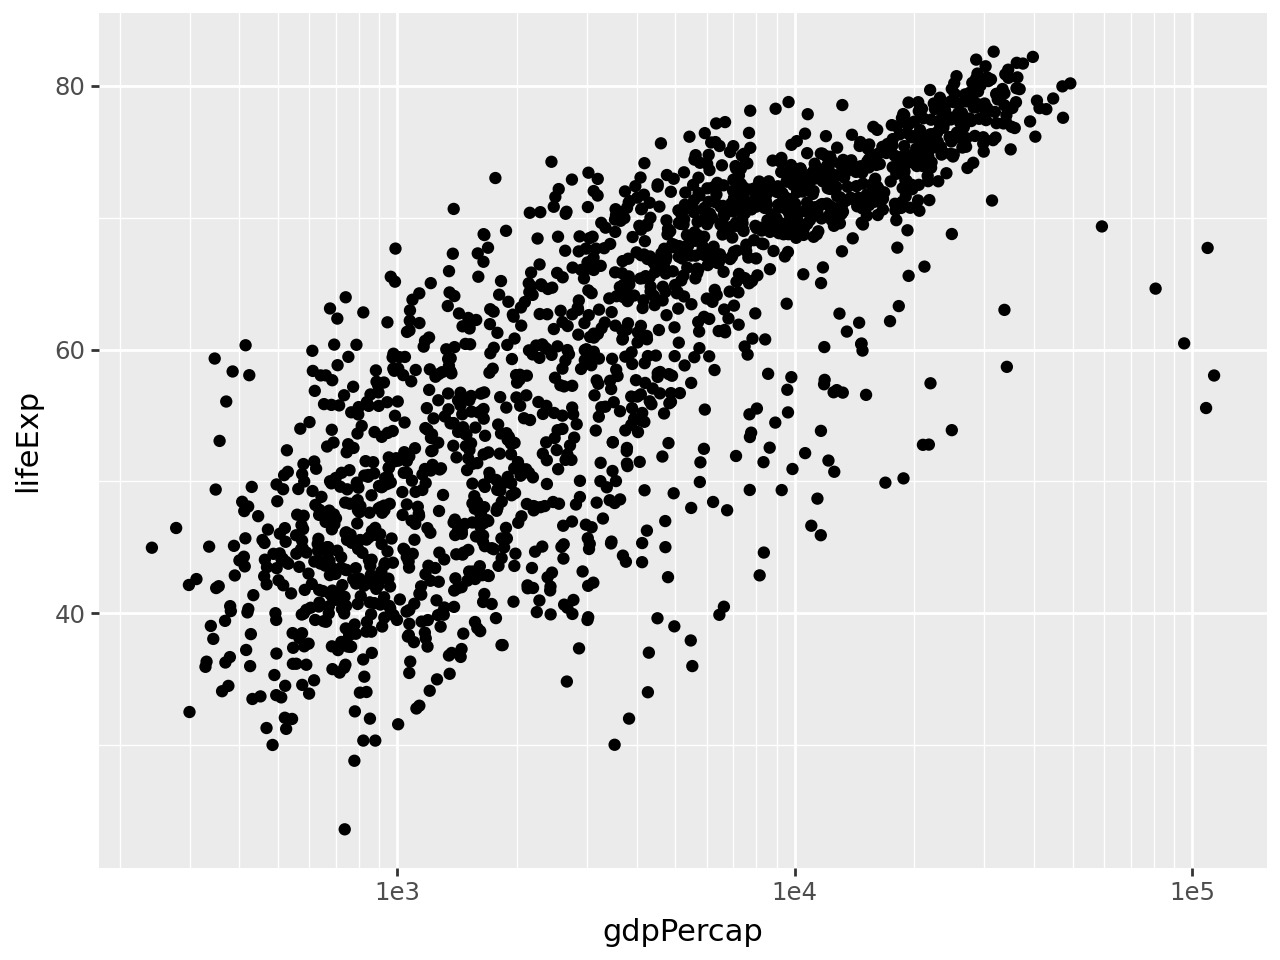

In [17]:
(ggplot(df, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10())

Similar trend is observed, but in a clear way. But we are still far away from answering the question.

For now, we can examine the relationship between income and life expectancy for a few countries aggregating the data (as we are currently doing) may obscure important heterogeneities. To start, we are going to look at the UK, Burkina Faso, Brazil and Norway: all countries at various points along the spectrum.

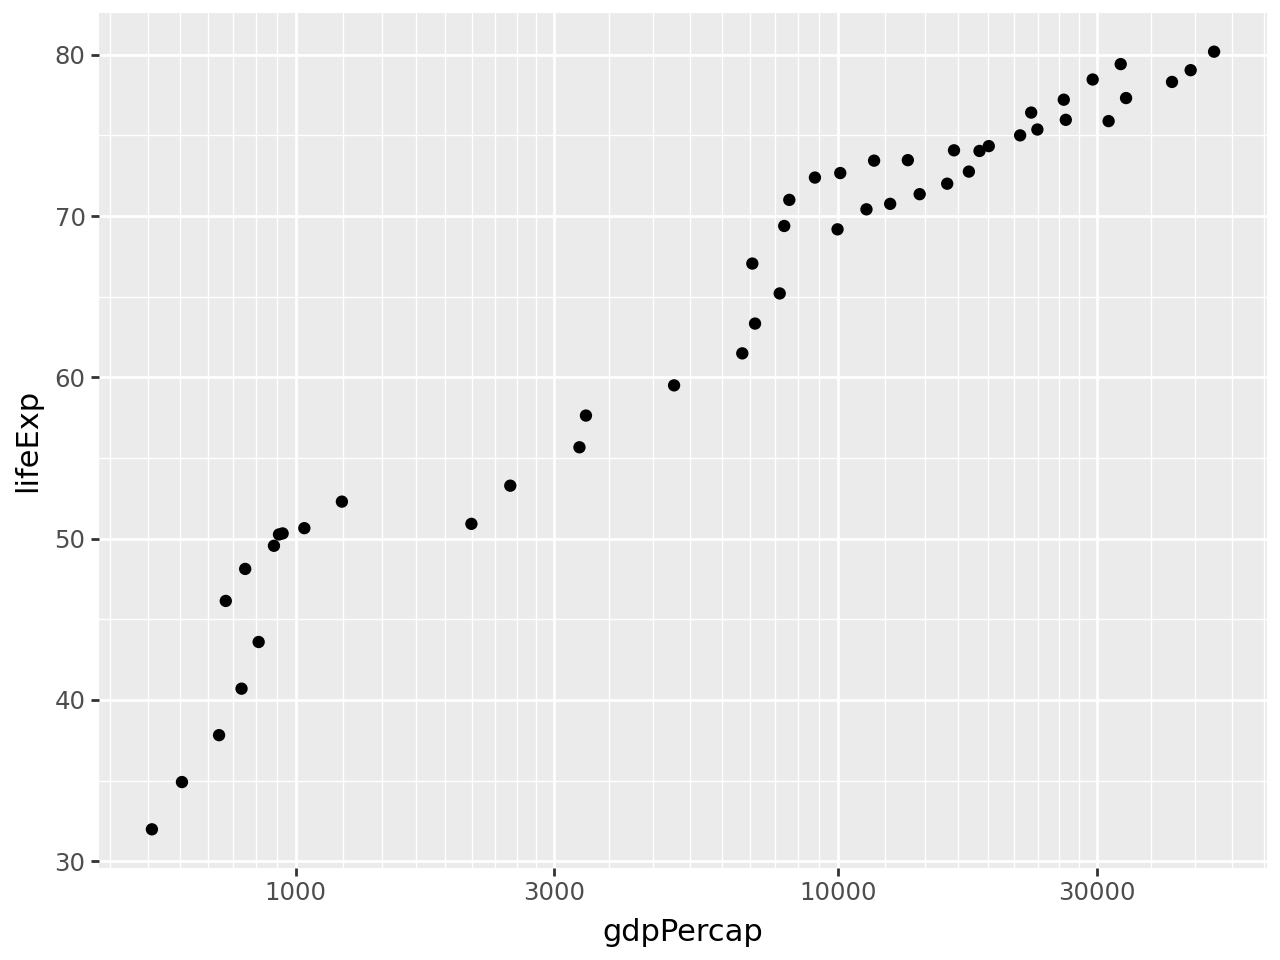

In [45]:
df_selection = df.query('country in ["United Kingdom", "Burkina Faso", "Brazil", "Norway"]')

(ggplot(df_selection, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10())

Ok, the above isn't too helpful, as we have not added in country identifiers.

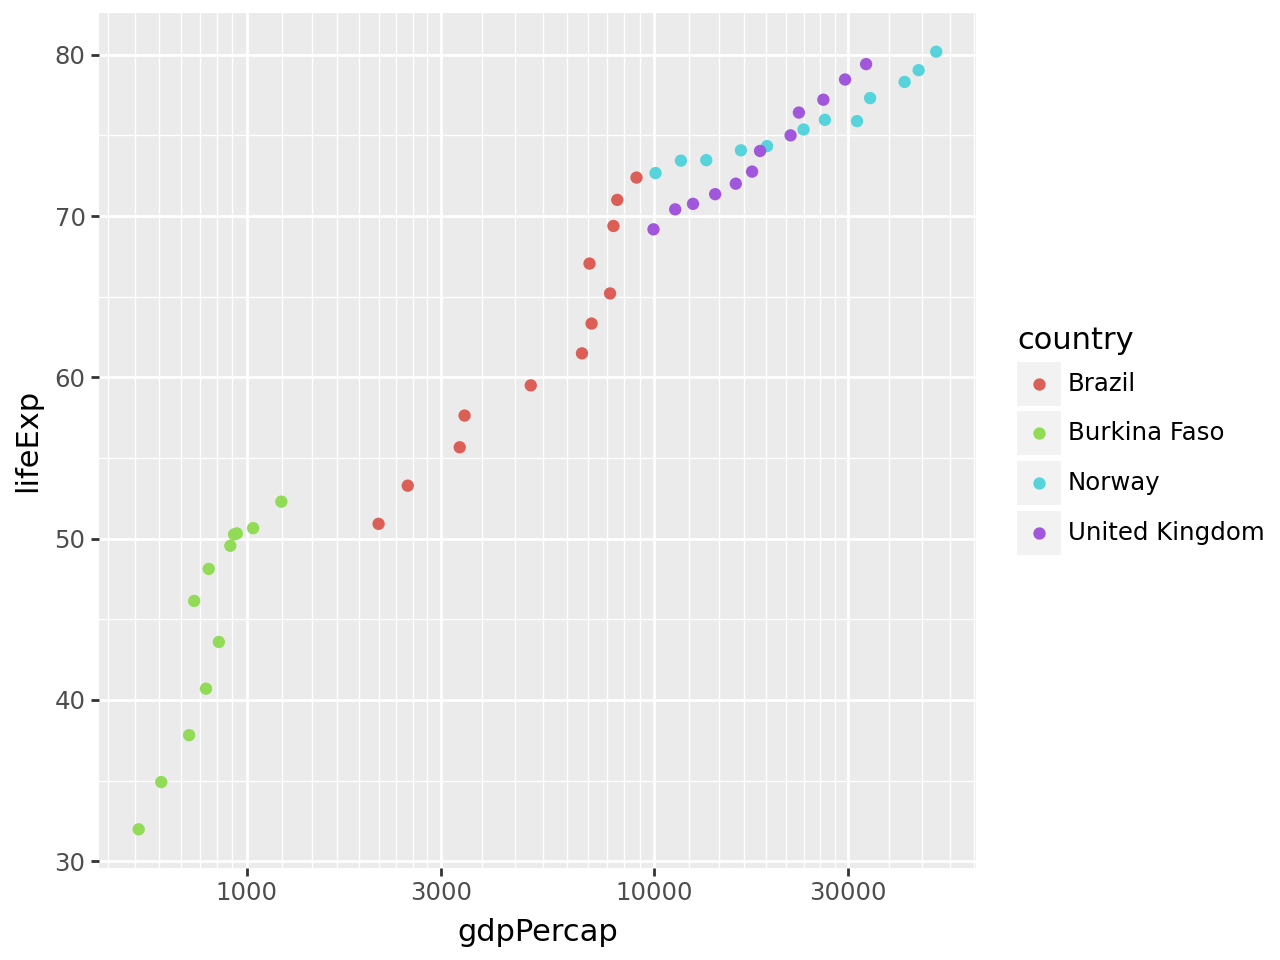

In [46]:
(ggplot(df_selection, aes(x='gdpPercap', y='lifeExp', colour='country')) +
geom_point() +
scale_x_log10())

Ok, the above is interesting but it's a bit difficult to see the relationships when they're all plotted on the same graph. So, This notebook is going to create panels for each graph.

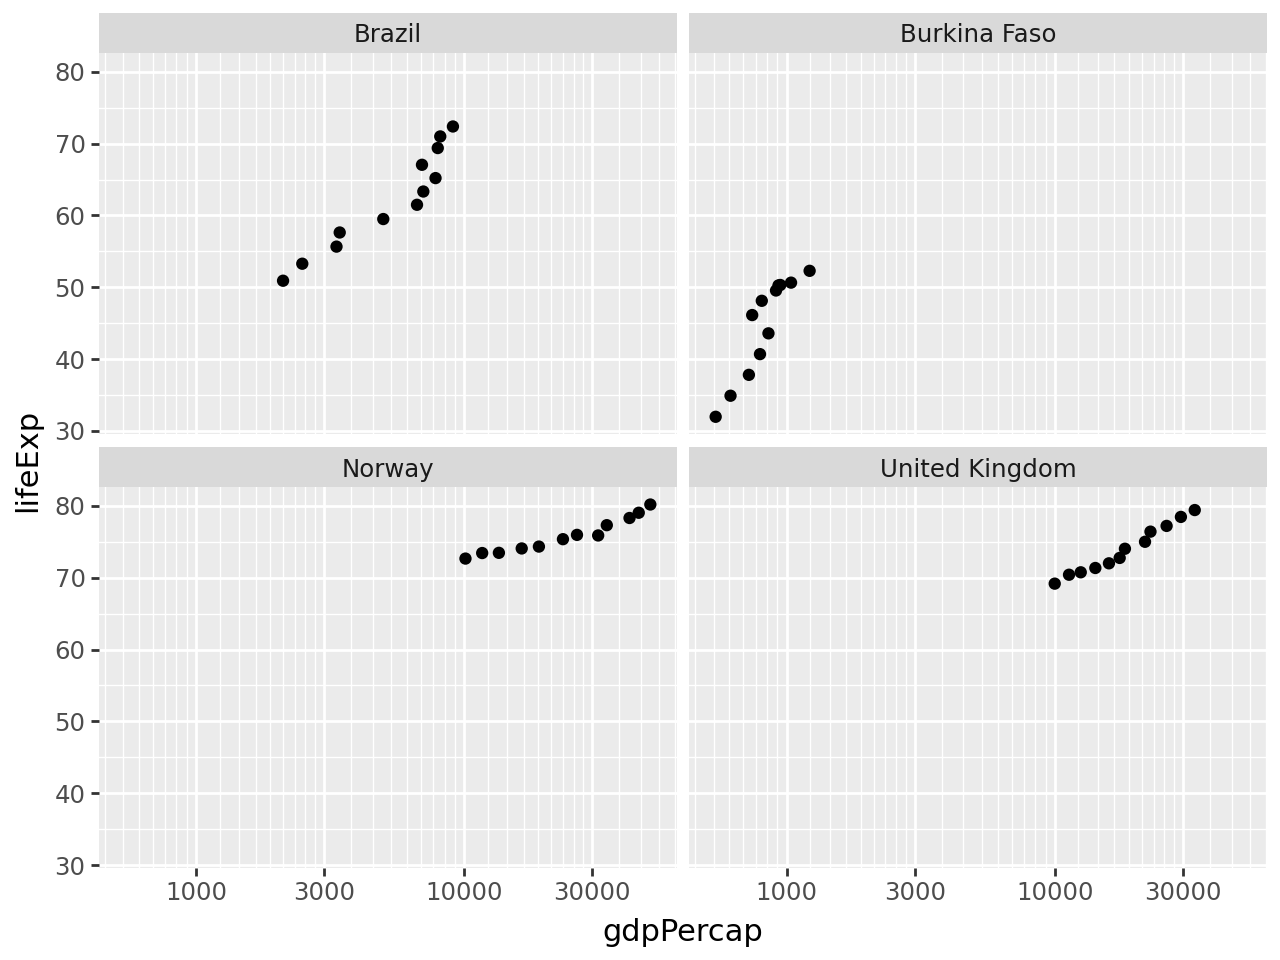

In [47]:
(ggplot(df_selection, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
facet_wrap('country'))

What if we add `colour='country'` to the aesthetics?

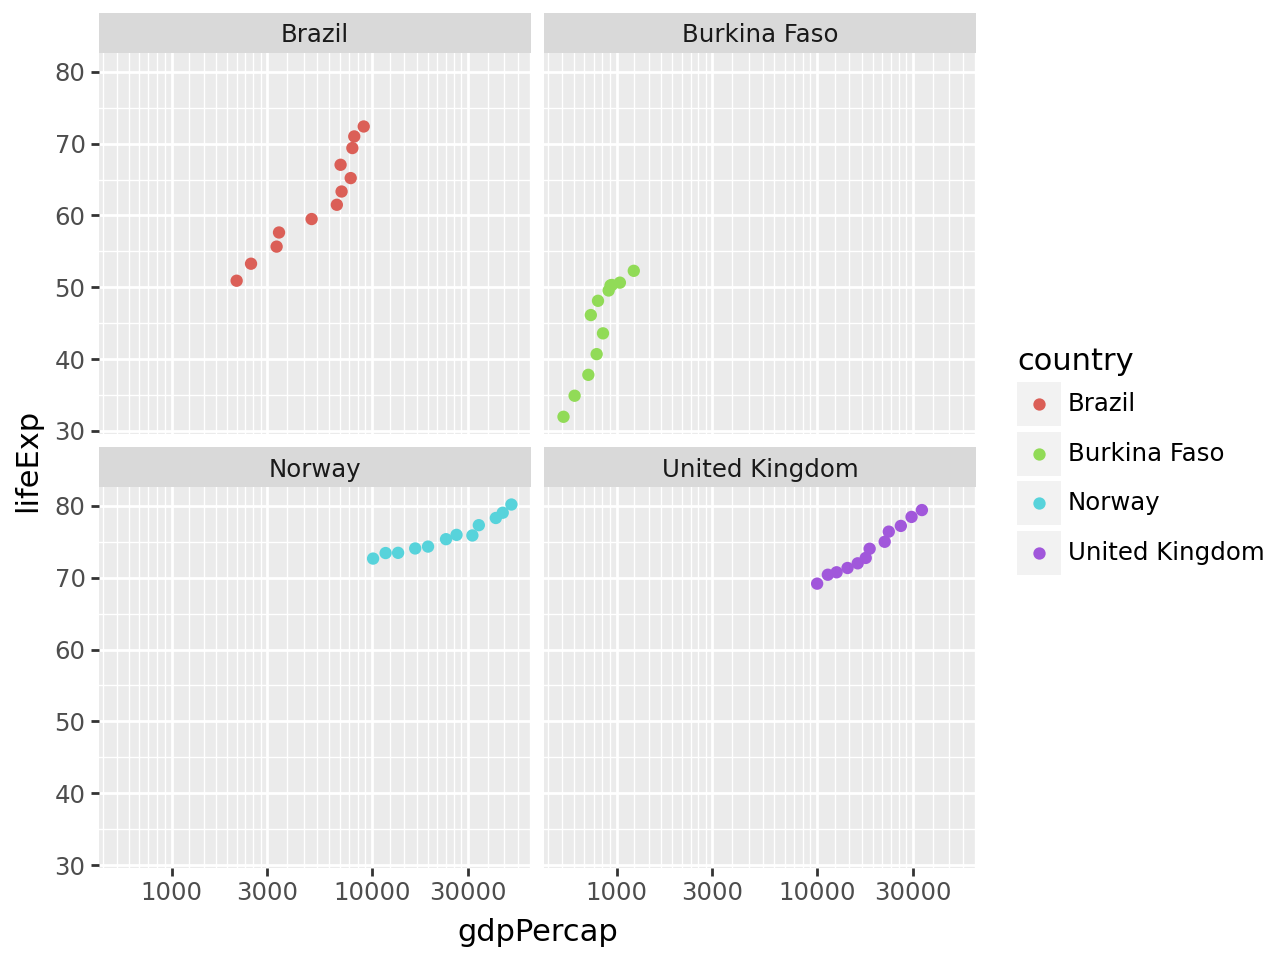

In [21]:
(ggplot(df_selection, aes(x='gdpPercap', y='lifeExp', colour='country')) +
geom_point() +
scale_x_log10() +
facet_wrap('country'))

Now, we are going to add linear regression lines to try to gauge the differences in association among this selection.

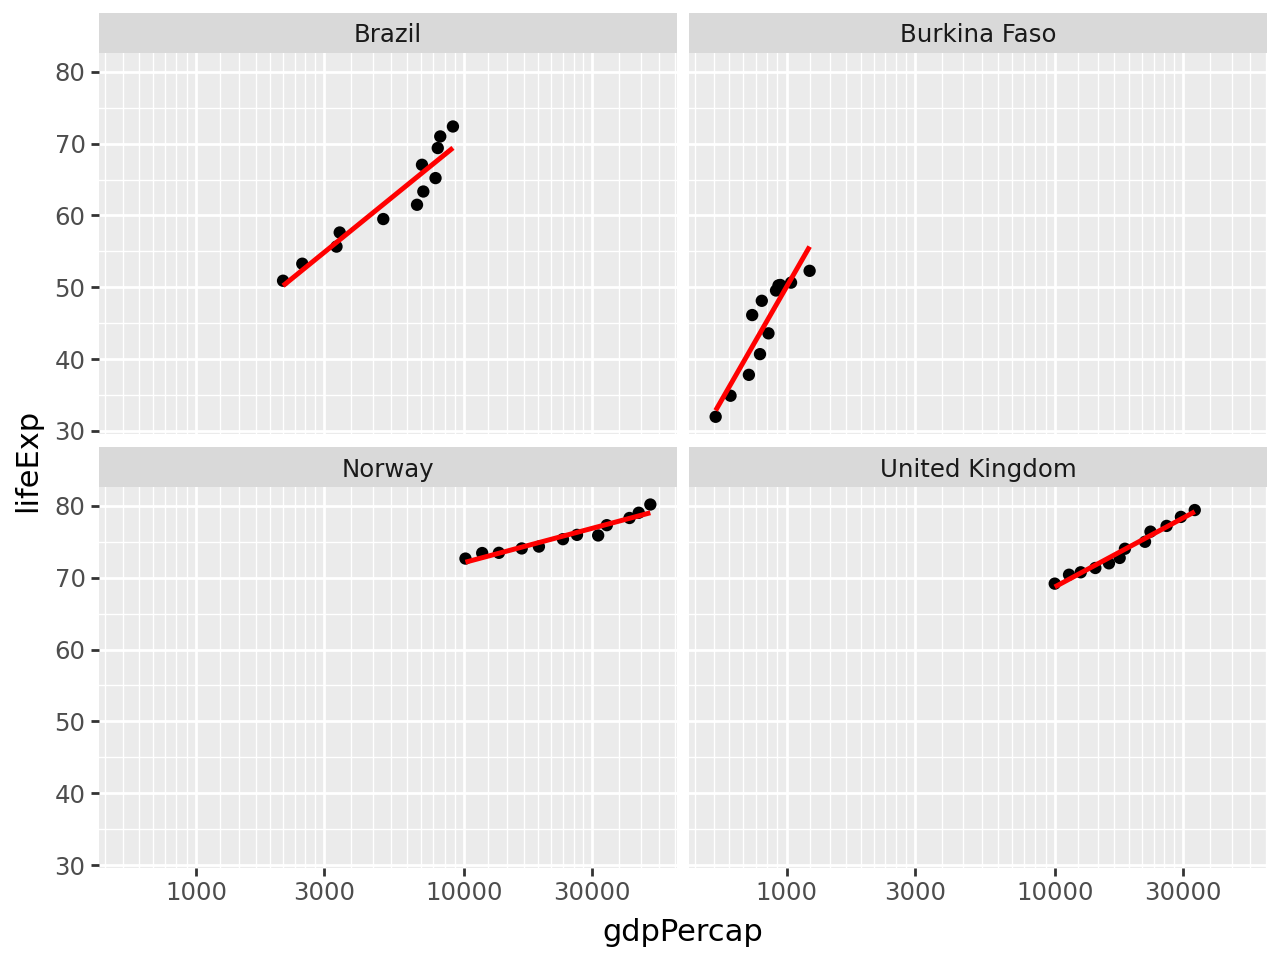

In [22]:
(ggplot(df_selection, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

The above suggests a few things: <br>
1. The association between income and life expectancy varies a great deal between countries
2. The increase in income decreases the association

<br>

Let us now pick a larger sample: all the countries in Europe. What does the relationship look like?

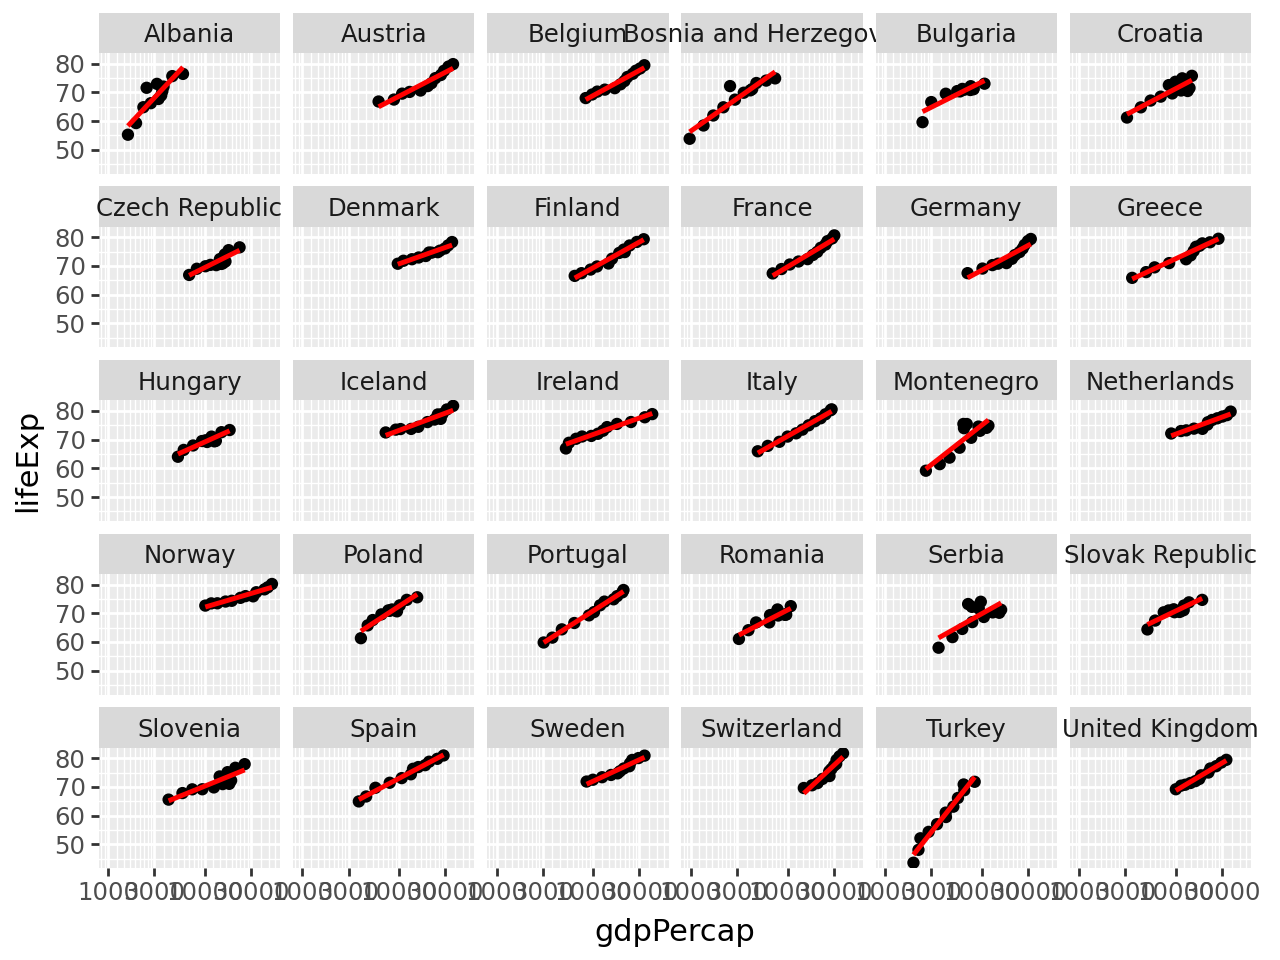

In [49]:
df_europe = df.query('continent == "Europe"')

(ggplot(df_europe, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

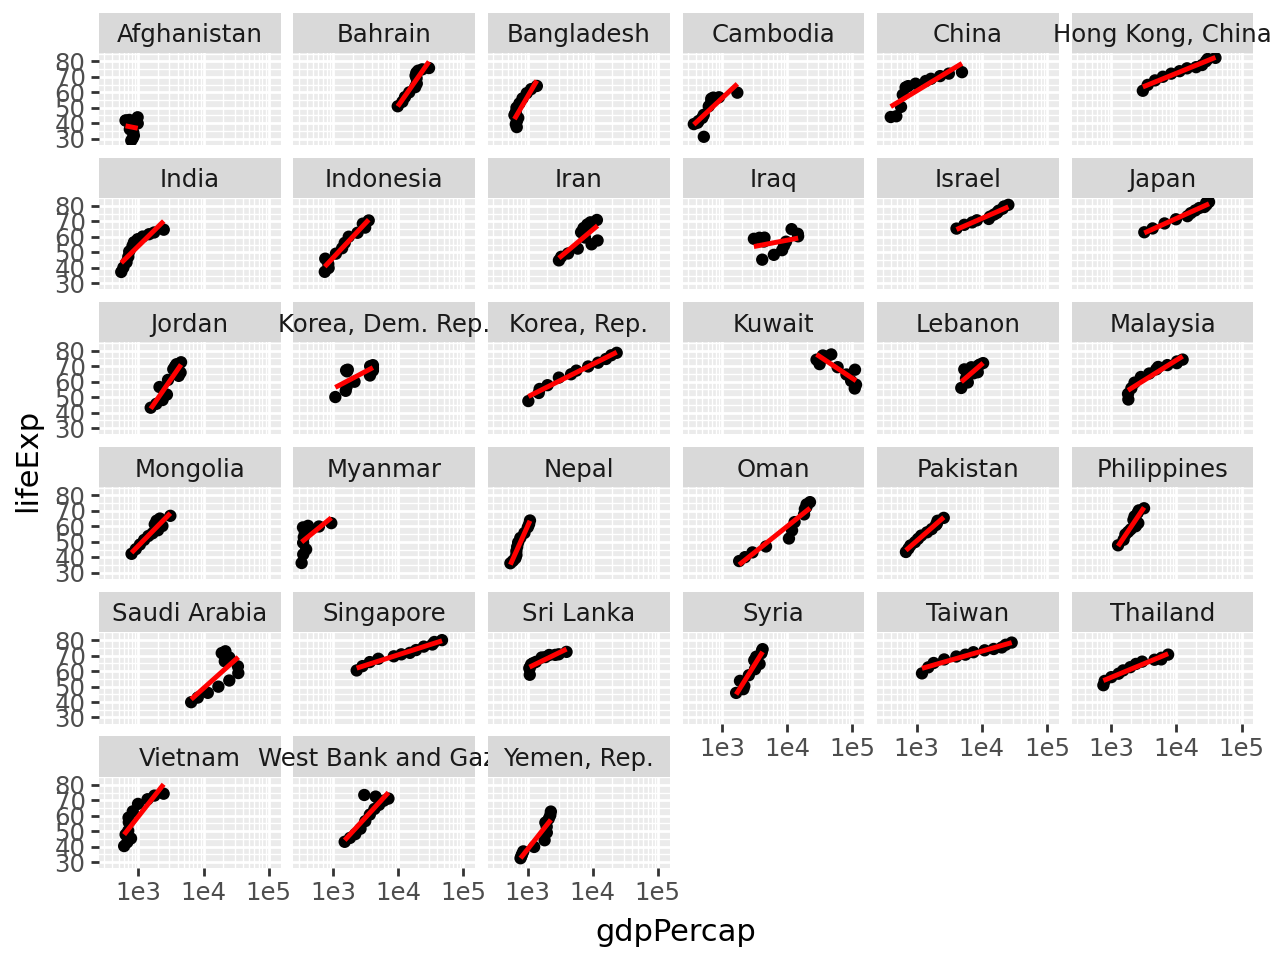

In [51]:
df_europe = df.query('continent == "Asia"')

(ggplot(df_europe, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

An alternative way to look at this is to visualise the regression lines only.

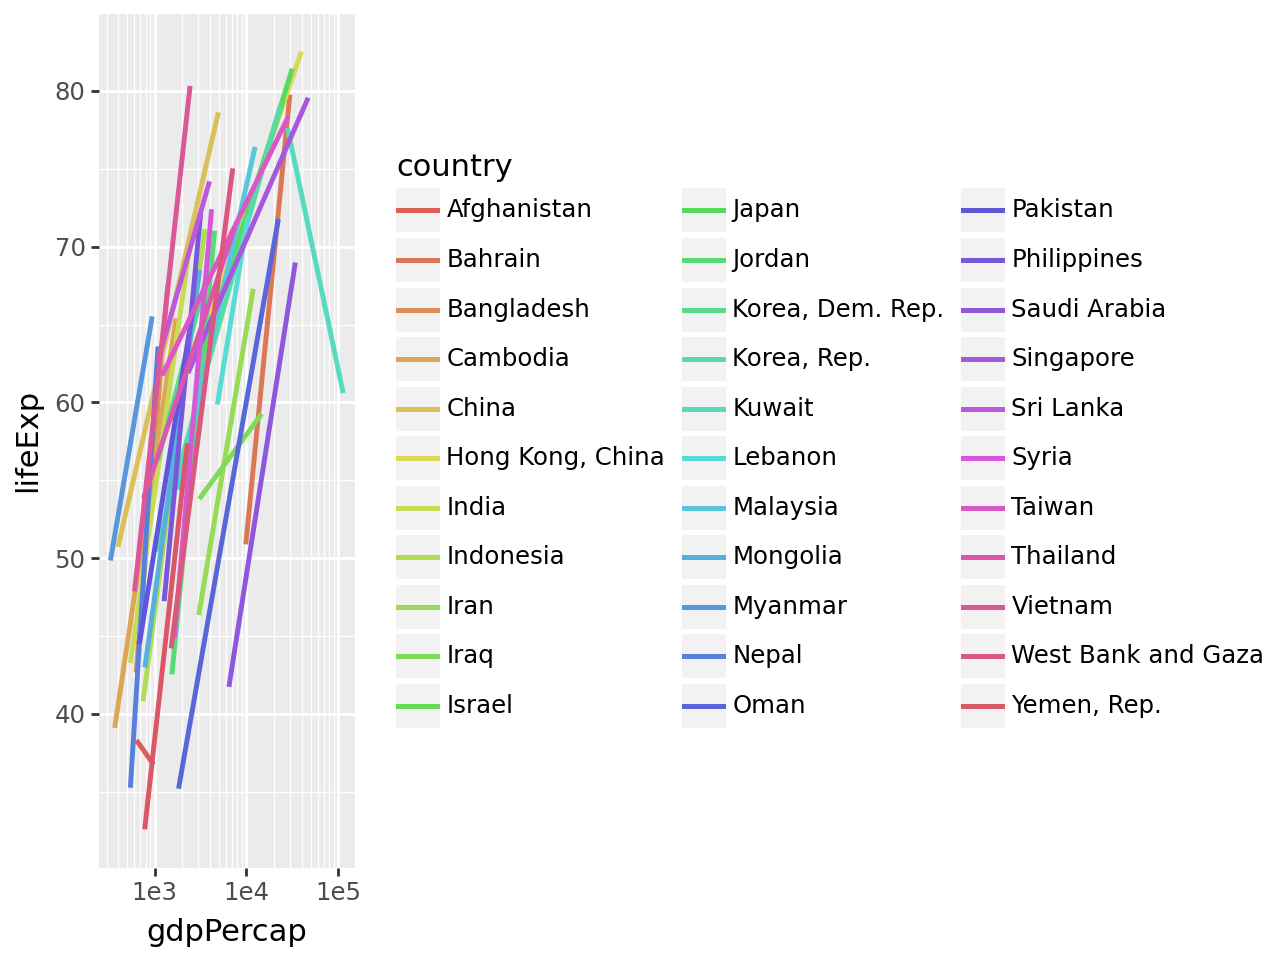

In [52]:
(ggplot(df_europe, aes(x='gdpPercap', y='lifeExp', colour='country')) +
scale_x_log10() +
geom_smooth(method="lm", se=False))

Kind of interesting...but still not sure it's be best plot.

Ok, now we will go back to our previous plot. Instead of focussing on Europe, we will plot a selection of countries from each range of income quantiles.

In [53]:
# determine mean incomes of each country and sort data frame according to these
df_sorted = df.groupby('country').mean(numeric_only=True).sort_values(by='gdpPercap').reset_index()

First we will look at the bottom 20 countries by mean income.

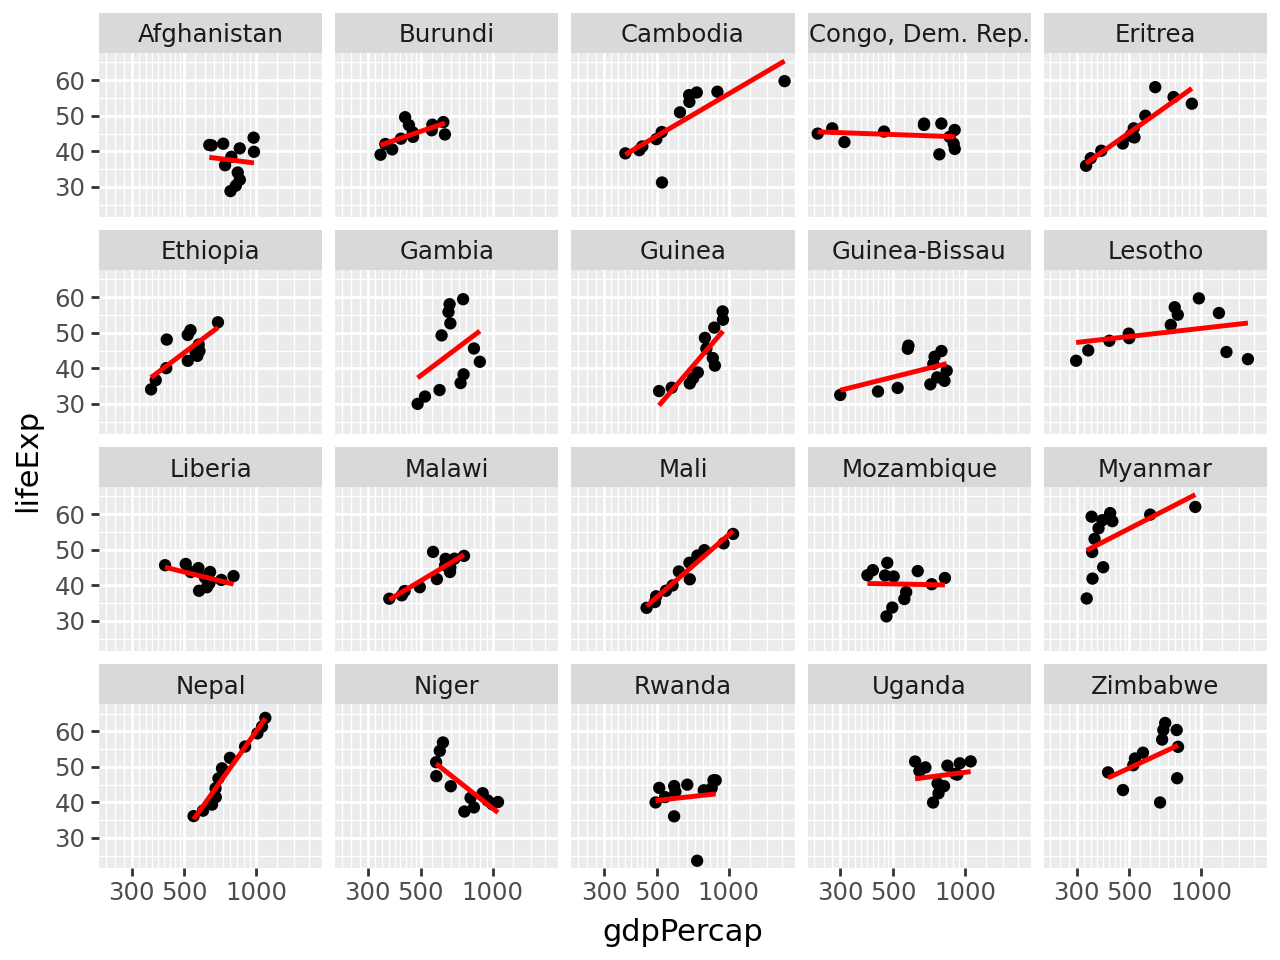

In [54]:
bottom_20 = list(df_sorted["country"][:20])
df_few = df.query('country in @bottom_20')

(ggplot(df_few, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

Interesting: lots of heterogeneity. We will now reorder according to income and see if any patterns emerge.

<ipython-input-55-c5f079a8ab27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-55-c5f079a8ab27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


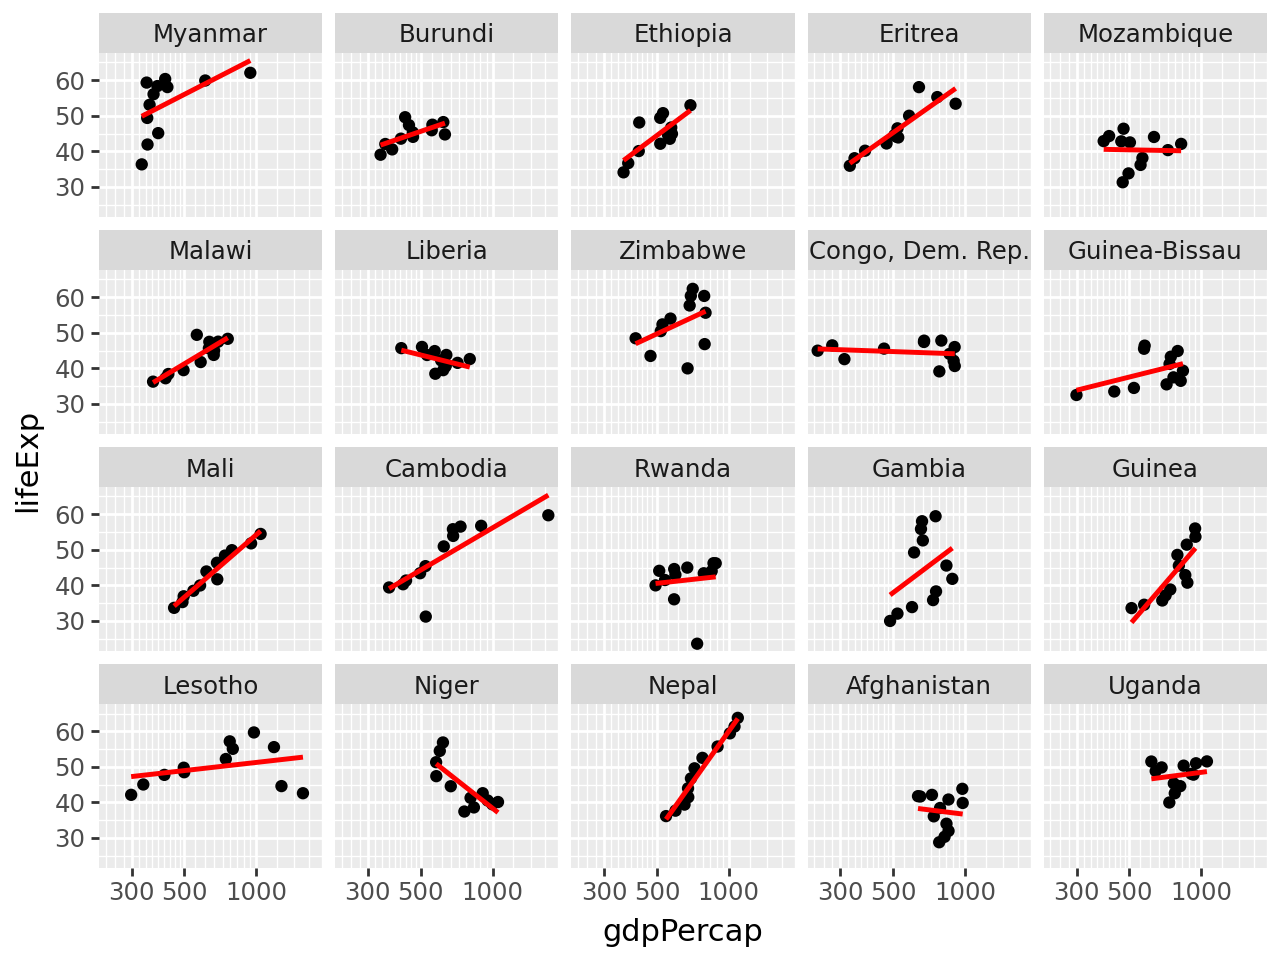

In [55]:
df_few["country"] = df_few["country"].astype('category')
df_few["country"] = df_few["country"].cat.reorder_categories(bottom_20)

(ggplot(df_few, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

Still there's a load of heterogeneity: it seems that increases in income at this end of the scale seem to potentially have a variety of associations with life expectancy. Could this be because there are many different ways for income to increase? For example, finding natural resources versus building a booming export economy? These different causes of changes in income likely mean that the relationship with life expectancy is quite various.

How about the top 20 instead?

<ipython-input-56-a0a61650c4df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-56-a0a61650c4df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


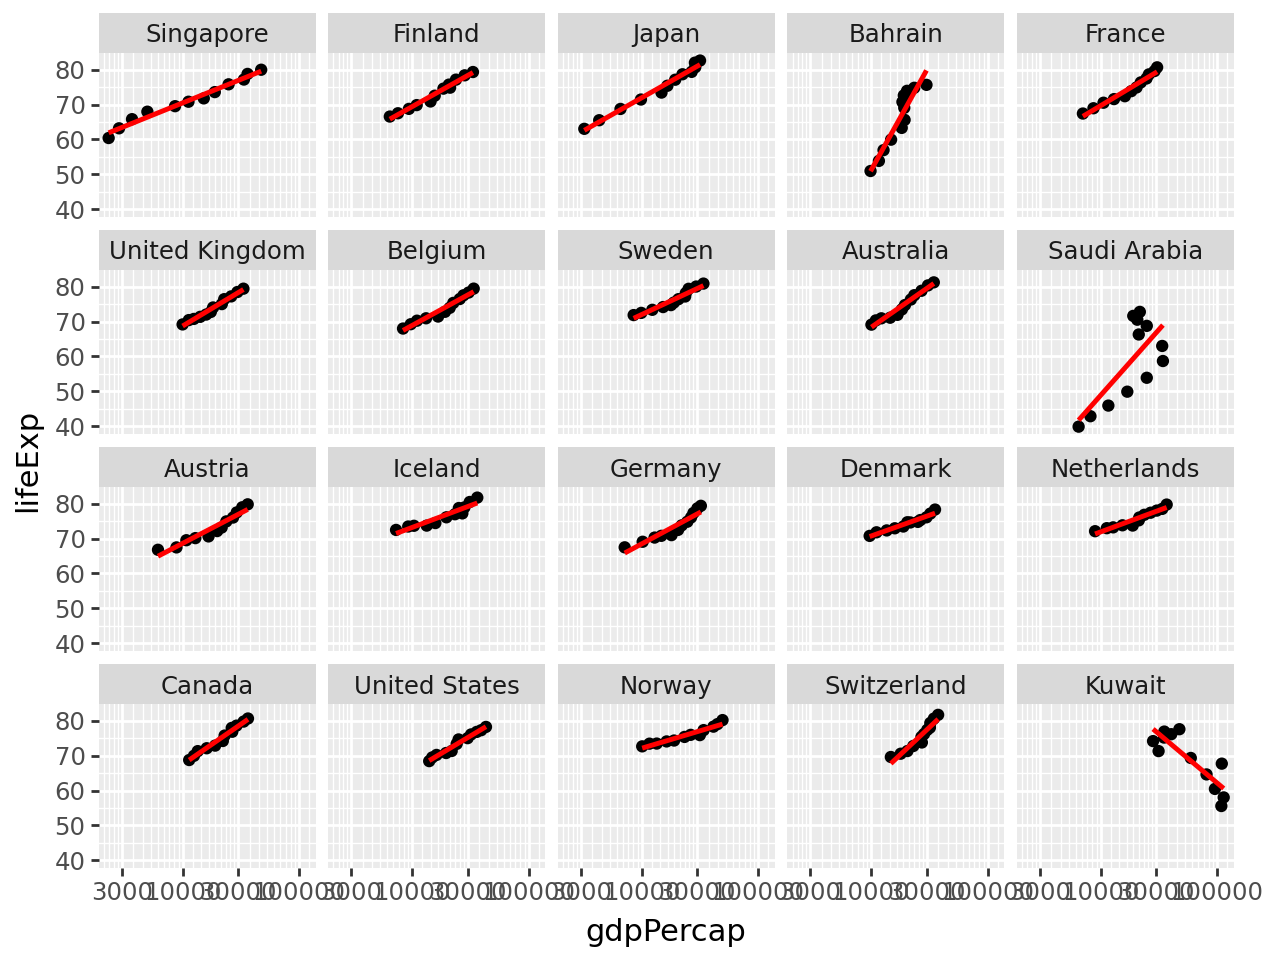

In [56]:
upper_index = 20
top = list(df_sorted["country"][-upper_index:])
df_few = df.query('country in @top')

(ggplot(df_few, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="orange") +
facet_wrap('country'))

df_few["country"] = df_few["country"].astype('category')
df_few["country"] = df_few["country"].cat.reorder_categories(top)

(ggplot(df_few, aes(x='gdpPercap', y='lifeExp')) +
geom_point() +
scale_x_log10() +
geom_smooth(method="lm", se=False, colour="red") +
facet_wrap('country'))

Interesting. These relationships (with the exception of the OPEC countries, e.g. Kuwait, Saudi Arabia etc.) are fairly stable and suggest that, as income increases, there is a decreased association between income and life expectancy.

### **Finally, to save the plot as image**

In [58]:
#folder_path = 'drive/MyDrive/DA209_DMV/'
#file_name = 'gapminder.csv'
#output_plot = 'p9plot.png'

#Variable p9plot is defined
p9plot = (ggplot(df_uk_bf, aes(x='year', y='lifeExp', colour='country')) +
geom_line())

p9plot.save(folder_path+output_plot)

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: drive/MyDrive/DA209_DMV/p9plot.png


*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*